In [89]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [90]:
from tensorflow.keras import datasets,layers,models
from tensorflow.keras.layers import Flatten
import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import softmax

In [91]:
(train_img,train_label),(test_img,test_label)=datasets.cifar10.load_data()

In [92]:
train_img,test_img=train_img/255.0,test_img/255.0

In [93]:
train_img.shape

(50000, 32, 32, 3)

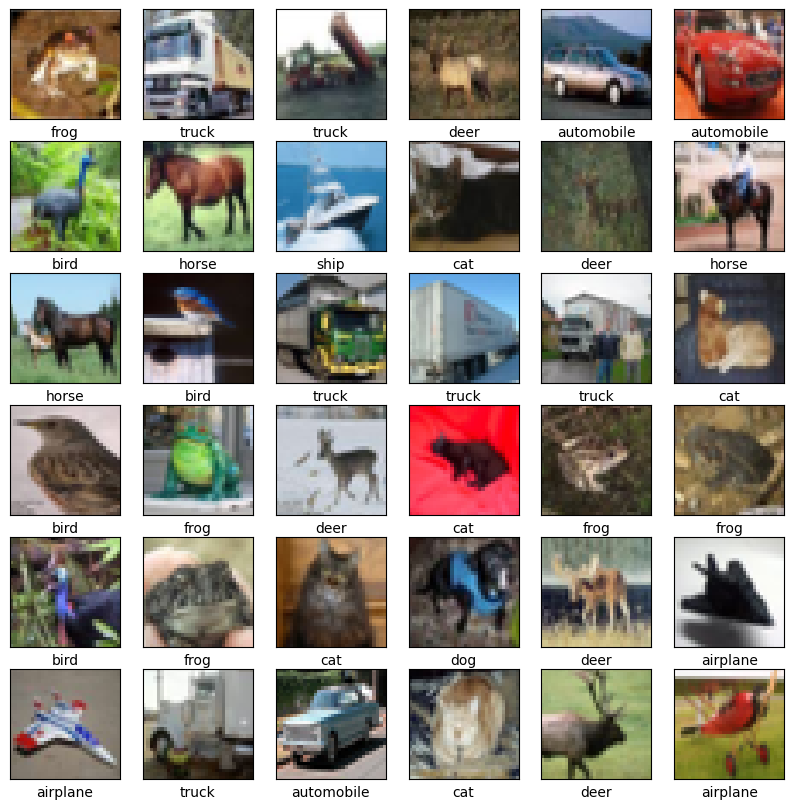

In [94]:
class_name=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
plt.figure(figsize=(10,10))
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_img[i])
    plt.xlabel(class_name[train_label[i][0]])


In [95]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation="relu",input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation="relu"))

In [96]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 4, 4, 64)            │          36,928 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

In [97]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation="relu"))
model.add(layers.Dense(10,activation="softmax"))

In [98]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [99]:
model.compile(optimizer="adam",loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [100]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

In [101]:
history=model.fit(train_img,train_label,epochs=10,validation_data=(test_img,test_label),callbacks=[early_stopping])

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.4424 - loss: 1.5271 - val_accuracy: 0.5520 - val_loss: 1.2465
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.5842 - loss: 1.1687 - val_accuracy: 0.6105 - val_loss: 1.0850
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.6379 - loss: 1.0229 - val_accuracy: 0.6467 - val_loss: 1.0126
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.6772 - loss: 0.9242 - val_accuracy: 0.6781 - val_loss: 0.9355
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.7036 - loss: 0.8498 - val_accuracy: 0.6765 - val_loss: 0.9351
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.7218 - loss: 0.7968 - val_accuracy: 0.6710 - val_loss: 0.9546
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.7370 - loss: 0.7498 - val_accuracy: 0.7105 - val_loss: 0.8593
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.7545 -

In [102]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Text(0, 0.5, 'accuracy')

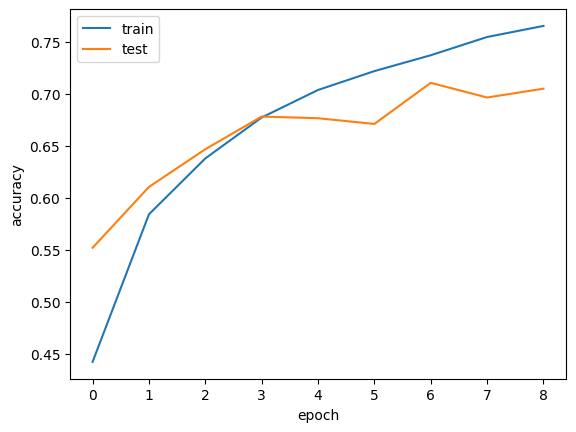

In [103]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.legend(["train","test"],loc="upper left")
plt.xlabel("epoch")
plt.ylabel("accuracy")

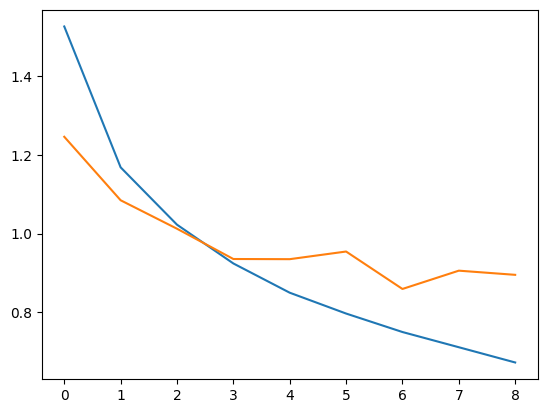

In [104]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

In [105]:
import numpy as np
y_pred = model.predict(test_img)
y_pred = np.argmax(y_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [106]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [107]:
ac=accuracy_score(test_label,y_pred)

In [108]:
ac

0.7049

In [109]:
cm=confusion_matrix(test_label,y_pred)

In [110]:
cm

array([[814,  29,  16,  13,   4,   5,   3,   8,  79,  29],
       [ 31, 880,   1,   6,   1,   2,   4,   4,  21,  50],
       [133,  12, 530,  70,  50,  78,  47,  27,  39,  14],
       [ 41,  16,  47, 489,  36, 213,  56,  36,  46,  20],
       [ 64,   9, 122,  42, 533,  55,  52,  93,  22,   8],
       [ 28,   6,  36, 131,  14, 662,  18,  59,  34,  12],
       [ 13,   8,  58,  63,  12,  31, 768,   9,  25,  13],
       [ 50,   7,  28,  28,  36,  65,   9, 745,   7,  25],
       [ 72,  31,   2,   8,   0,   1,   2,   2, 861,  21],
       [ 46, 113,   2,  11,   1,   6,   3,   3,  48, 767]])